## Helpful Documentation:
- https://github.com/kpu/kenlm
- Old but useful: http://victor.chahuneau.fr/notes/2012/07/03/kenlm.html
- http://smithamilli.com/blog/kneser-ney/
- There are more notes here: https://kheafield.com/code/kenlm/estimation/

In [1]:
from article_process import ArticleLM

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
path_to_data = '/Users/stephanie/data/newsela_article_corpus_2016-01-29'
path_to_kenlm = '/Users/stephanie/github/kenlm'
path_to_arpa = path_to_kenlm + '/lm'

In [4]:
articleLM = ArticleLM(path_to_data, path_to_kenlm, path_to_arpa)

In [5]:
articleLM.metadata_split.head()

,Unnamed: 0,Unnamed: 0.1,slug,language,title,grade_level,version,filename,train_val_test,is_original
1,1,1,10dollarbill-woman,en,Americans weigh in to choose the woman who wil...,8,1,10dollarbill-woman.en.1.txt,train,False
2,2,2,10dollarbill-woman,en,The $10 question: Who will be the new face on ...,6,2,10dollarbill-woman.en.2.txt,val,False
3,3,3,10dollarbill-woman,en,New $10 bill will have a theme and a woman's p...,5,3,10dollarbill-woman.en.3.txt,train,False
4,4,4,10dollarbill-woman,en,We will soon have an American woman's face on ...,3,4,10dollarbill-woman.en.4.txt,train,False
6,6,6,17century-selfies,en,Dutch Golden Age artists created some of the o...,9,1,17century-selfies.en.1.txt,train,False


## Remove `is_original`
Only do this once

In [29]:
from utils.redshift_connection import df_from_query

In [30]:
is_original_q = """
SELECT ah.slug AS slug,
       -- al.article_header_id AS article_header_id,
       CAST(al.grade_level AS int) AS grade_level,
       al.is_original AS is_original
FROM public.article_levels al
JOIN public.article_headers ah
    ON al.article_header_id = ah.article_header_id
WHERE ah.slug in {}
""".format(tuple(articleLM.metadata.slug.unique()))
is_original = df_from_query(is_original_q)

In [31]:
df = pd.merge(articleLM.metadata, is_original, on=['slug', 'grade_level'], how='left')

In [34]:
len(df[(df.is_original==True) & (df.grade_level < 12)])

60

In [72]:
df[(df.is_original==True) & (df.grade_level < 12)].head()

,slug,language,title,grade_level,version,filename,is_original
624,apple-beats,en,Apple adds more swagger with $3B Beats acquisi...,9,0,apple-beats.en.0.txt,True
684,arizona-posse,en,Arizona immigration posse now on school patrol,8,0,arizona-posse.en.0.txt,True
706,art-heist,en,FBI seeks help in solving famous crime,4,3,art-heist.en.3.txt,True
727,arts-education,en,First lady: Arts education good for good schools,9,0,arts-education.en.0.txt,True
842,autism-jobs,en,"Data entry, software testing offer autistic pe...",8,0,autism-jobs.en.0.txt,True


In [18]:
articleLM.metadata_split = pd.merge(articleLM.metadata_split, is_original, on=['slug', 'grade_level'], how='left')
articleLM.metadata_split.to_csv(articleLM.path_to_data + '/articles_metadata_split.csv')

In [27]:
len(articleLM.metadata_split)

10786

In [ ]:
len(articleLM.metadata_split)

In [24]:
articleLM.metadata_split[articleLM.metadata_split.is_original == True].grade_level.unique()

array([12,  9,  8,  4, 10,  6,  3, 11])

In [26]:
articleLM.metadata_split[articleLM.metadata_split.grade_level==12].is_original.unique()

array([True, False], dtype=object)

## Preprocess testing

In [5]:
import re
from nltk import sent_tokenize, word_tokenize

In [76]:
articleLM.metadata_split[(['stink' in x for x in articleLM.metadata_split.slug])]

,Unnamed: 0,Unnamed: 0.1,slug,language,title,grade_level,version,filename,train_val_test,is_original
9212,9212,9212,stinkbugs-crops,en,Stink bugs threaten U.S. orchards and crops,8,1,stinkbugs-crops.en.1.txt,train,False
9213,9213,9213,stinkbugs-crops,en,Stink bugs a persistent problem for U.S. crops,6,2,stinkbugs-crops.en.2.txt,train,False
9214,9214,9214,stinkbugs-crops,en,Stink bugs can be a big pest for U.S. orchards,5,3,stinkbugs-crops.en.3.txt,test,False
9215,9215,9215,stinkbugs-crops,en,"In the U.S., stink bugs can do a lot of damage",4,4,stinkbugs-crops.en.4.txt,train,False


In [10]:
articleLM.metadata[(['US' in x for x in articleLM.metadata.slug])]

,slug,language,title,grade_level,version,filename
176,US-Constitution,en,The Constitution of the United States of America,12,0,US-Constitution.en.0.txt
177,USCHINA-TOURISM,en,Chinese tourists' spending in the US takes off,12,0,USCHINA-TOURISM.en.0.txt
178,USCHINA-TOURISM,en,"Chinese tourists hit the outlet stores, not th...",8,1,USCHINA-TOURISM.en.1.txt
179,USCHINA-TOURISM,en,"Chinese tourists seek shops, not sand, in Cali...",7,2,USCHINA-TOURISM.en.2.txt
180,USCHINA-TOURISM,en,"Chinese tourists hit the mall, not the beach, ...",5,3,USCHINA-TOURISM.en.3.txt
181,USCHINA-TOURISM,en,"Chinese tourists go shopping, not sunning, in ...",4,4,USCHINA-TOURISM.en.4.txt


In [11]:
articleLM.metadata_split[articleLM.metadata_split.filename=='US-Constitution.en.0.txt']

,Unnamed: 0,Unnamed: 0.1,slug,language,title,grade_level,version,filename,train_val_test,is_original


In [12]:
def split_article(article_text):
    """
    Ingests raw article text (text string)
    :param path:
    :return: List of strings (individual sentences)
    """
    # first split the text string on new lines to recognize paragraphs as different sentences
    paragraphs = article_text.split('\n')
    paragraphs = [i for i in paragraphs if len(i) > 0]  # makes sure that we do not include blank spaces
    all_sentences = []

    clean = re.compile('<.*?>')  # for removing html tags

    for p in paragraphs:
        sentences_list = sent_tokenize(p)
        sentences_list = [i for i in sentences_list if len(i) > 0]  # prevents blank sentences from being added
        # print('found {} sentences'.format(len(sentences_list)))
        for sentence in sentences_list:
#             sentence = sentence.rstrip(
#                 '.!?;').lower()  # remove ending punctuation and put the sentence into lower case
            sentence = sentence.lower()
            # data pre-processing step to remove embedded http links
            if len(sentence) > 1:
                words = sentence.split(' ')
                words = [i for i in words if 'http' not in i]  # pull out words that are actually html tags
                if len(words) > 1:  # ignore one word sentences
                    sentence = ' '.join(words)
            # data pre-processing step to remove and html tags
            sentence = re.sub(clean, '', sentence)  # remove any html tags that are present
            if len(sentence) > 1:
                # tokens = nltk.re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", sentence)
                all_sentences.append(sentence)
    return all_sentences

In [13]:
articleLM.metadata.filename[176]

'US-Constitution.en.0.txt'

In [14]:
articleLM.get_article_text(articleLM.metadata.filename[176])

'## Preamble\n\nWe the People of the United States, in Order to form a more perfect Union, establish Justice, insure domestic Tranquility, provide for the common defence, promote the general Welfare, and secure the Blessings of Liberty to ourselves and our Posterity, do ordain and establish this Constitution for the United States of America.\n\n## Article. I.\n\nSection. 1.\n\nAll legislative Powers herein granted shall be vested in a Congress of the United States, which shall consist of a Senate and House of Representatives.\n\nSection. 2.\n\nThe House of Representatives shall be composed of Members chosen every second Year by the People of the several States, and the Electors in each State shall have the Qualifications requisite for Electors of the most numerous Branch of the State Legislature.\n\nNo Person shall be a Representative who shall not have attained to the Age of twenty five Years, and been seven Years a Citizen of the United States, and who shall not, when elected, be an 

In [15]:
stnce_list = split_article(articleLM.get_article_text(articleLM.metadata.filename[176]))
stnce_list[:5]

['## preamble',
 'we the people of the united states, in order to form a more perfect union, establish justice, insure domestic tranquility, provide for the common defence, promote the general welfare, and secure the blessings of liberty to ourselves and our posterity, do ordain and establish this constitution for the united states of america.',
 '## article.',
 'i.',
 'section.']

In [16]:
[' '.join(word_tokenize(sentence)).lower() for sentence in stnce_list]

['# # preamble',
 'we the people of the united states , in order to form a more perfect union , establish justice , insure domestic tranquility , provide for the common defence , promote the general welfare , and secure the blessings of liberty to ourselves and our posterity , do ordain and establish this constitution for the united states of america .',
 '# # article .',
 'i .',
 'section .',
 '1 .',
 'all legislative powers herein granted shall be vested in a congress of the united states , which shall consist of a senate and house of representatives .',
 'section .',
 '2 .',
 'the house of representatives shall be composed of members chosen every second year by the people of the several states , and the electors in each state shall have the qualifications requisite for electors of the most numerous branch of the state legislature .',
 'no person shall be a representative who shall not have attained to the age of twenty five years , and been seven years a citizen of the united states

In [79]:
stnce_list

['college park, md.',
 '— j.d.',
 'rinehart has a problem in his orchard.',
 'stink bugs are damaging his apples and peaches.',
 'rinehart first noticed the problem five years ago.',
 'he saw brownish spots on his apples and peaches.',
 'rinehart thought the fruit was low in calcium.',
 "but spraying the fruit with calcium didn't help.",
 'university of maryland scientists cut open his fruit and examined it.',
 'then it became clear that the problem was stink bugs.',
 'the bugs are more damaging to fruit than a lack of calcium.',
 'they are also more unpredictable.',
 'rinehart owns rinehart orchards in maryland.',
 'he said stink bugs damage between one tenth and one fifth of his crop every year.',
 '"they are a major, major issue in our orchards."',
 'rinehart said.',
 '"it\'s nothing that you can take lightly."',
 '## "surviving the winter"',
 'the stink bugs do not belong here.',
 'they came to north america in the late 1990s.',
 'the bugs caused bad damage in 2010 and 2011.',
 'so

## Builds the processed sentences that I need for KenLM

In [6]:
articleLM.build_data()

In [7]:
text = articleLM.get_article_text(articleLM.metadata.filename[9215])

In [8]:
text[:100]

'<img class="pull-right" src="https://newsela-test-files-f331e.s3.amazonaws.com/article_media/extra/2'

In [10]:
articleLM.grade_level_sentences['val'].keys()

dict_keys([6, 4, 9, 7, 8, 5, 3, 2])

In [11]:
articleLM.metadata_split[articleLM.metadata_split.grade_level==12]

,Unnamed: 0,Unnamed: 0.1,slug,language,title,grade_level,version,filename,train_val_test,is_original
8258,8258,8258,sanctuary-cities-spanish,es,Algunas 'ciudades santuario' en EEUU temen dem...,12,0,sanctuary-cities-spanish.es.0.txt,val,False


## This will do the training, but I don't train again after I've already done it once.

In [12]:
articleLM.train_all_arpas()

Processing 8
Grade 8 has 38400 sentences in the train set.
=== 1/5 Counting and sorting n-grams ===
Reading stdin
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
****************************************************************************************************
Unigram tokens 742451 types 32365
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:388380 2:1340829952 3:2514056192 4:4022489856 5:5866131456
Statistics:
1 32365 D1=0.592211 D2=1.02506 D3+=1.45563
2 287309 D1=0.766591 D2=1.13573 D3+=1.44691
3 552598 D1=0.891525 D2=1.25565 D3+=1.43271
4 647062 D1=0.956586 D2=1.39164 D3+=1.56766
5 648394 D1=0.979082 D2=1.48773 D3+=1.5433
Memory estimate for binary LM:
type       kB
probing 47070 assuming -p 1.5
probing 55909 assuming -r models -p 1.5
trie    22188 without quantization
trie    11843 assuming -q 8 -b 8 quantization 
trie    19872 

=== 1/5 Counting and sorting n-grams ===
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
Unigram tokens 662616 types 26747
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:320964 2:1340836480 3:2514068480 4:4022509312 5:5866159616
Statistics:
1 26747 D1=0.577945 D2=1.03671 D3+=1.59455
2 245242 D1=0.761151 D2=1.13701 D3+=1.4165
3 477932 D1=0.883848 D2=1.25228 D3+=1.41682
4 563090 D1=0.950525 D2=1.38654 D3+=1.56671
5 561288 D1=0.974725 D2=1.49036 D3+=1.71496
Memory estimate for binary LM:
type       kB
probing 40692 assuming -p 1.5
probing 48333 assuming -r models -p 1.5
trie    19136 without quantization
trie    10187 assuming -q 8 -b 8 quantization 
trie    17163 assuming -a 22 array pointer compression
trie     8214 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:320964 2:3923872 3:9558640 4:13514160 5:15716064
=== 4/5 Calculating and writin

In [9]:
# Can also train just one grade level at a time
# articleLM.train_arpa(2)

## Printing out stats

how many sentences there are in training set, indexed by grade level

In [13]:
for g in articleLM.grade_level_sentences.get('train').keys():
    print(g, len(articleLM.grade_level_sentences.get('train').get(g)))

8 38400
5 53107
3 16115
9 24243
7 45515
4 61524
6 41748
2 6950
10 208


In [71]:
sentence_len = 0
for g in articleLM.grade_level_sentences.get('train').keys():
    sentence_len+=len(articleLM.grade_level_sentences.get('train').get(g))

In [72]:
sentence_len

287810

In [73]:
sentence_len = 0
for g in articleLM.grade_level_sentences.get('val').keys():
    sentence_len+=len(articleLM.grade_level_sentences.get('val').get(g))
print(sentence_len)

61204


how many articles there are in each set, indexed by grade level

In [14]:
articleLM.metadata_split[articleLM.metadata_split.train_val_test=='train'].grade_level.value_counts()

4     1196
5     1043
7      945
6      827
8      818
9      584
3      433
2      198
10       4
Name: grade_level, dtype: int64

In [75]:
articleLM.metadata_split[articleLM.metadata_split.train_val_test=='train'].grade_level.value_counts().sum()

6048

In [15]:
articleLM.metadata_split[articleLM.metadata_split.train_val_test=='val'].grade_level.value_counts()

4     269
7     218
5     204
6     181
8     161
9     130
3     102
2      36
12      1
10      1
Name: grade_level, dtype: int64

In [16]:
articleLM.metadata_split[articleLM.metadata_split.train_val_test=='test'].grade_level.value_counts()

4    245
5    239
7    201
8    168
6    162
9    134
3     79
2     49
Name: grade_level, dtype: int64

In [14]:
len(articleLM.metadata_split)

8628

In [ ]:
articleLM.compute_perplexity_validation('val', 2)

In [17]:
def compute_perplexity_validation(split_type, grade_level):
    # Split type can be 'val' or 'test'
    sample_perp = dict()
    for ix, sentence in enumerate(articleLM.grade_level_sentences[split_type][grade_level]):
        perplexities = articleLM.compute_sentence_perplexities(sentence)
        sample_perp[ix] = perplexities
    sample_perp_df = pd.DataFrame(sample_perp).T
    sample_perp_df.columns = sorted(articleLM.models.keys())
    return sample_perp_df

In [10]:
import pandas as pd

In [29]:
for ix, sentence in enumerate(articleLM.grade_level_sentences['val'][2]):
     perplexities = articleLM.compute_sentence_perplexities(sentence)

In [30]:
perplexities

[250.0085957692233,
 326.5919789254105,
 157.64826777289863,
 148.76504699556824,
 160.11189992044885,
 18.014581783703907,
 136.46682216940155,
 17.06018638906965,
 132.41926609524762,
 17.046273216423238]

## Example: This all perplexities comparing each grade level (columns) with each sentence in all of 2nd grade 
Rows indexes the sentence number from articleLM.grade_level_sentences['val'][2]

`articleLM.grade_level_sentences` is a dict that has `train`, `val`, and `test` keys. Each dict has a dict to each grade level, which stores a list of sentences parsed to be pushed into KenLM.

In [18]:
GL = dict()

In [19]:
grade_levels_considered = [2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
for gl in sorted(articleLM.grade_level_sentences['val'].keys()):
    GL[gl] = articleLM.compute_perplexity_validation('val', gl)

Grade Level 10 failed


In [21]:
# for gl in sorted(articleLM.grade_level_sentences['val'].keys()):
#     print(gl)
#     print(GL[gl].min_perplexity.describe())

In [64]:
articleLM.metadata_split.grade_level.unique()

array([ 8,  6,  5,  3,  9,  7,  4,  2, 10, 12])

In [68]:
articleLM.grade_level_sentences['val'][9]

['in a pre-calculus class at john champe high school in loudoun county , virginia , juniors and seniors are learning abstract mathematical ideas .',
 'meanwhile , in a personal-finance course , 16- and 17-year-olds are learning about something that might seem even more abstract for the teenagers : retirement .',
 'virginia was one of many states that moved to offer more personal-finance courses on the heels of the great recession , when the u.s. economy worsened from 2007 to 2009 and many people lost jobs .',
 'the state wanted to instill practical money-management skills to help the next generation avoid the pitfalls that many of their parents experienced .',
 'proponents of the requirement argued that american children were falling behind in financial literacy , or understanding of money matters .',
 'they said that the increasingly complex world of credit cards and student loans demanded a new kind of education .',
 'results from the 2012 program of international student assessment 

In [23]:
perplex_best_guess = []
perplex_gl = []

for gl in sorted(articleLM.grade_level_sentences['val'].keys()):

    perplex_best_guess.extend(GL[gl].min_perplexity)
    perplex_gl.extend(np.ones_like(GL[gl].min_perplexity) * gl)
    
perplex_guesses = pd.DataFrame({'grade_level':perplex_gl, 'best_guess': perplex_best_guess})

In [24]:
perplex_guesses[perplex_guesses.grade_level == 2].best_guess.describe()

count    1258.000000
mean        4.381558
std         1.609650
min         2.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         9.000000
Name: best_guess, dtype: float64

Text(0, 0.5, 'Predicted Grade Level')

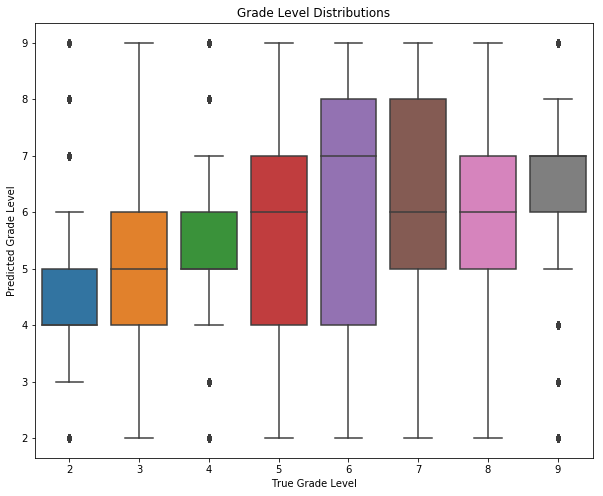

In [63]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_title("Grade Level Distributions")
# ax.set_xlabel("True Grade Level")
# ax.set_ylabel("Predicted Grade Level")
sns.boxplot(ax=ax, x="grade_level", y="best_guess", data=perplex_guesses)
ax.set_xlabel("True Grade Level")
ax.set_ylabel("Predicted Grade Level")

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(perplex_guesses.grade_level, perplex_guesses.best_guess)

In [31]:
np.linalg.norm(perplex_guesses.grade_level - perplex_guesses.best_guess, ord=2)

549.5843884245621

In [40]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(np.array(perplex_guesses.grade_level).reshape(-1, 1), 
                            np.array(perplex_guesses.best_guess))

In [42]:
lm.coef_

array([0.24146857])

In [43]:
lm.intercept_

4.492743003025859

In [44]:
lm.score(np.array(perplex_guesses.grade_level).reshape(-1, 1), 
                            np.array(perplex_guesses.best_guess))

0.059888864646219

In [47]:
len(perplex_guesses[perplex_guesses.grade_level == perplex_guesses.best_guess] ) * 100/ len(perplex_guesses)

5.0339847068819035

In [ ]:
perplex_guesses.loc[:,'school_type_actual'] = list(1 if x >= 5 else 0 for x in perplex_guesses.grade_level)
perplex_guesses.loc[:,'school_type_est'] = list(1 if x >= 5 else 0 for x in perplex_guesses.best_guess)

In [50]:
perplex_guesses.loc[:,'high_actual'] = list(1 if x >= 5 else 0 for x in perplex_guesses.grade_level)
perplex_guesses.loc[:,'high_est'] = list(1 if x >= 5 else 0 for x in perplex_guesses.best_guess)

In [56]:
for i in [2,3,4,5,6,7,8,9]:
    print("gl",i)
    gl_df = perplex_guesses[perplex_guesses.grade_level == i]
    print("length", len(gl_df))
    print(len(gl_df[gl_df.grade_level == gl_df.best_guess]) * 100/ len(gl_df))

gl 2
length 1258
13.751987281399046
gl 3
length 3502
8.509423186750428
gl 4
length 14120
7.606232294617564
gl 5
length 10372
3.5190898573081375
gl 6
length 8993
2.813299232736573
gl 7
length 10617
3.6545163417161155
gl 8
length 7014
4.590818363273453
gl 9
length 5328
3.903903903903904


In [51]:
confusion_matrix(perplex_guesses.high_actual, perplex_guesses.high_est)

array([[ 5161, 13719],
       [ 9942, 32382]])

In [52]:
len(perplex_guesses[perplex_guesses.high_actual == perplex_guesses.high_est] ) * 100/ len(perplex_guesses)

61.34076204169662

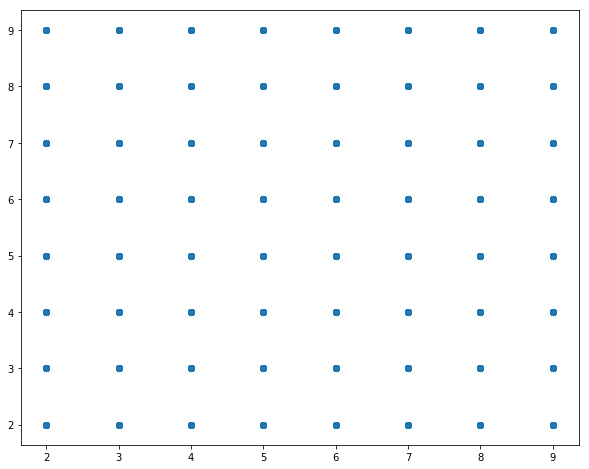

In [35]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.scatter(perplex_guesses.grade_level, perplex_guesses.best_guess)

In [ ]:
# Remove is_original articles

In [ ]:
print(GL[12].min_perplexity.mode())
print(GL[12].max_perplexity.mode())

In [15]:
print(GL[12].min_perplexity.mode())
print(GL[12].max_perplexity.mode())

0    8
dtype: int64
0    3
dtype: int64


In [9]:
articleLM.grade_level_sentences['val'].get(6)[5]

'an abolitionist who helped to end slavery .'

In [10]:
articleLM.grade_level_sentences['val'].get(2)[5]

'his name is fazle hasan abed .'

In [29]:
sorted(model.keys())

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12]

In [12]:
# articleLM.text_sentences_for_grade(2, True)

## ARCHIVED

In [17]:
articleLM.train_arpa(2)

Grade 2 has 8140 sentences in the training set.
=== 1/5 Counting and sorting n-grams ===
Reading stdin
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
****************************************************************************************************
Unigram tokens 77147 types 7247
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:86964 2:1340859264 3:2514111488 4:4022577920 5:5866259968
Statistics:
1 7247 D1=0.587801 D2=1.08954 D3+=1.56537
2 37930 D1=0.778791 D2=1.19549 D3+=1.51871
3 59374 D1=0.882787 D2=1.31476 D3+=1.5341
4 63672 D1=0.946344 D2=1.48411 D3+=1.50262
5 59302 D1=0.972426 D2=1.58325 D3+=1.31886
Memory estimate for binary LM:
type      kB
probing 4999 assuming -p 1.5
probing 5970 assuming -r models -p 1.5
trie    2296 without quantization
trie    1213 assuming -q 8 -b 8 quantization 
trie    2121 assuming -a 22 array poin

In [23]:
for grade_level in articleLM.grade_level_train_sentences.keys():
    print('Processing {}'.format(grade_level))
    articleLM.train_arpa(grade_level)

Processing 12
Grade 12 has 70339 sentences in the training set.
=== 1/5 Counting and sorting n-grams ===
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
Unigram tokens 1701343 types 67748
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:812976 2:1340788480 3:2513978624 4:4022365440 5:5865950208
Statistics:
1 67748 D1=0.596335 D2=1.0247 D3+=1.51618
2 603184 D1=0.766528 D2=1.13251 D3+=1.44168
3 1226628 D1=0.885567 D2=1.2354 D3+=1.45629
4 1481759 D1=0.953303 D2=1.37475 D3+=1.53093
5 1513009 D1=0.977679 D2=1.43837 D3+=1.48664
Memory estimate for binary LM:
type     MB
probing 103 assuming -p 1.5
probing 122 assuming -r models -p 1.5
trie     50 without quantization
trie     27 assuming -q 8 -b 8 quantization 
trie     44 assuming -a 22 array pointer compression
trie     21 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:812976 2:9650944 3:2453256

=== 1/5 Counting and sorting n-grams ===
Reading stdin
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
****************************************************************************************************
Unigram tokens 198792 types 12972
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:155664 2:1340852608 3:2514098944 4:4022557952 5:5866230784
Statistics:
1 12972 D1=0.583245 D2=1.04729 D3+=1.59745
2 84402 D1=0.76402 D2=1.16715 D3+=1.46525
3 145230 D1=0.877772 D2=1.25399 D3+=1.51978
4 162868 D1=0.941427 D2=1.40244 D3+=1.45998
5 156883 D1=0.967368 D2=1.51688 D3+=1.41989
Memory estimate for binary LM:
type       kB
probing 12286 assuming -p 1.5
probing 14636 assuming -r models -p 1.5
trie     5717 without quantization
trie     3032 assuming -q 8 -b 8 quantization 
trie     5198 assuming -a 22 array pointer compression
trie     2513 assum

In [ ]:
articleLM.train_all_arpas()

In [17]:
import subprocess

In [ ]:
from subprocess import Popen, PIPE, STDOUT

p = Popen(['grep', 'f'], stdout=PIPE, stdin=PIPE, stderr=STDOUT)    
grep_stdout = p.communicate(input=b'one\ntwo\nthree\nfour\nfive\nsix\n')[0]
print(grep_stdout.decode())

NameError: name 'path_to_arpa' is not defined

In [1]:
import nltk
from article import Library
# path = '/Users/stzeng/code/github/autograder/data/newsela_article_corpus_2016-01-29/'
path = '/Users/stephanie/data/newsela_article_corpus_2016-01-29/'
library = Library(path)
library.create_grade_level_library()
# print(library.library['zuckerberg-internet'].article_text(4.0))

library.metadata.groupby('grade_level').count()

,slug,language,title,version,filename
grade_level,,,,,
2,283,283,283,283,283
3,616,616,616,616,616
4,1730,1730,1730,1730,1730
5,1488,1488,1488,1488,1488
6,1171,1171,1171,1171,1171
7,1365,1365,1365,1365,1365
8,1152,1152,1152,1152,1152
9,862,862,862,862,862
10,21,21,21,21,21


In [ ]:
# nltk.download('punkt')

In [2]:
from process import *

In [4]:
path = '/Users/stephanie/data/newsela_article_corpus_2016-01-29/'
metadata = pd.read_csv(path + 'articles_metadata.csv')
metadata.loc[:, 'grade_level'] = metadata.grade_level.astype('int')
metadata_train = pd.read_csv(path + 'articles_metadata_train.csv')
metadata_test = pd.read_csv(path + 'articles_metadata_test.csv')

for gl in [2, 3, 4, 5, 6, 7, 8, 9, 12]:
    print(gl)
    print_grade_level_shapes(metadata_train, metadata_test, gl)

2
Train shape (198, 7)
Test shape (85, 7)
3
Train shape (434, 7)
Test shape (182, 7)
4
Train shape (1208, 7)
Test shape (522, 7)
5
Train shape (1044, 7)
Test shape (444, 7)
6
Train shape (828, 7)
Test shape (343, 7)
7
Train shape (945, 7)
Test shape (420, 7)
8
Train shape (822, 7)
Test shape (330, 7)
9
Train shape (594, 7)
Test shape (268, 7)
12
Train shape (1459, 7)
Test shape (637, 7)


In [5]:
! python process.py 2 | ~/github/kenlm/build/bin/lmplz -o 3 > GL2.arpa

=== 1/5 Counting and sorting n-grams ===
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
Unigram tokens 77147 types 7247
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:86964 2:4780455424 3:8963353600
Statistics:
1 7247 D1=0.587801 D2=1.08954 D3+=1.56537
2 37930 D1=0.778791 D2=1.19549 D3+=1.51871
3 59374 D1=0.860848 D2=1.28242 D3+=1.40264
Memory estimate for binary LM:
type      kB
probing 2116 assuming -p 1.5
probing 2367 assuming -r models -p 1.5
trie     914 without quantization
trie     533 assuming -q 8 -b 8 quantization 
trie     875 assuming -a 22 array pointer compression
trie     494 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:86964 2:606880 3:1187480
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
###############################################################################

In [6]:
! python process.py 3 | ~/github/kenlm/build/bin/lmplz -o 3 > GL3.arpa

=== 1/5 Counting and sorting n-grams ===
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
Unigram tokens 198792 types 12972
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:155664 2:4780431360 3:8963308544
Statistics:
1 12972 D1=0.583245 D2=1.04729 D3+=1.59745
2 84402 D1=0.76402 D2=1.16715 D3+=1.46525
3 145230 D1=0.855721 D2=1.20474 D3+=1.45815
Memory estimate for binary LM:
type      kB
probing 4860 assuming -p 1.5
probing 5405 assuming -r models -p 1.5
trie    2080 without quantization
trie    1191 assuming -q 8 -b 8 quantization 
trie    1974 assuming -a 22 array pointer compression
trie    1085 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:155664 2:1350432 3:2904600
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
#########################################################################

In [7]:
! python process.py 4 | ~/github/kenlm/build/bin/lmplz -o 3 > GL4.arpa

=== 1/5 Counting and sorting n-grams ===
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
Unigram tokens 829750 types 30239
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:362868 2:4780359168 3:8963173376
Statistics:
1 30239 D1=0.577754 D2=1.05543 D3+=1.57045
2 272851 D1=0.753521 D2=1.13059 D3+=1.43538
3 551377 D1=0.846526 D2=1.21969 D3+=1.42214
Memory estimate for binary LM:
type       kB
probing 16854 assuming -p 1.5
probing 18571 assuming -r models -p 1.5
trie     7068 without quantization
trie     3958 assuming -q 8 -b 8 quantization 
trie     6669 assuming -a 22 array pointer compression
trie     3559 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:362868 2:4365616 3:11027540
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
###############################################################

In [8]:
! python process.py 5 | ~/github/kenlm/build/bin/lmplz -o 3 > GL5.arpa

=== 1/5 Counting and sorting n-grams ===
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
Unigram tokens 819274 types 32541
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:390492 2:4780349440 3:8963154944
Statistics:
1 32541 D1=0.583686 D2=1.08003 D3+=1.54791
2 286102 D1=0.756318 D2=1.14027 D3+=1.4059
3 569252 D1=0.856522 D2=1.21962 D3+=1.40494
Memory estimate for binary LM:
type       kB
probing 17538 assuming -p 1.5
probing 19341 assuming -r models -p 1.5
trie     7381 without quantization
trie     4145 assuming -q 8 -b 8 quantization 
trie     6962 assuming -a 22 array pointer compression
trie     3725 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:390492 2:4577632 3:11385040
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
################################################################

In [9]:
! python process.py 6 | ~/github/kenlm/build/bin/lmplz -o 3 > GL6.arpa

=== 1/5 Counting and sorting n-grams ===
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
Unigram tokens 733243 types 34508
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:414096 2:4780341248 3:8963139584
Statistics:
1 34508 D1=0.587213 D2=1.05437 D3+=1.5943
2 281994 D1=0.766817 D2=1.14875 D3+=1.41288
3 537093 D1=0.868 D2=1.2397 D3+=1.4185
Memory estimate for binary LM:
type       kB
probing 16926 assuming -p 1.5
probing 18713 assuming -r models -p 1.5
trie     7298 without quantization
trie     4175 assuming -q 8 -b 8 quantization 
trie     6881 assuming -a 22 array pointer compression
trie     3759 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:414096 2:4511904 3:10741860
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
#####################################################################

In [10]:
! python process.py 7 | ~/github/kenlm/build/bin/lmplz -o 3 > GL7.arpa

=== 1/5 Counting and sorting n-grams ===
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
Unigram tokens 893174 types 40615
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:487380 2:4780316160 3:8963092480
Statistics:
1 40615 D1=0.583532 D2=1.09183 D3+=1.58595
2 339700 D1=0.766086 D2=1.15023 D3+=1.37507
3 655627 D1=0.868356 D2=1.23355 D3+=1.41805
Memory estimate for binary LM:
type       kB
probing 20517 assuming -p 1.5
probing 22666 assuming -r models -p 1.5
trie     8818 without quantization
trie     5032 assuming -q 8 -b 8 quantization 
trie     8318 assuming -a 22 array pointer compression
trie     4531 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:487380 2:5435200 3:13112540
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
###############################################################

In [11]:
! python process.py 8 | ~/github/kenlm/build/bin/lmplz -o 3 > GL8.arpa

=== 1/5 Counting and sorting n-grams ===
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
Unigram tokens 831418 types 41552
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:498624 2:4780312064 3:8963085312
Statistics:
1 41552 D1=0.59951 D2=1.05162 D3+=1.45627
2 330946 D1=0.770558 D2=1.14571 D3+=1.45273
3 625081 D1=0.874872 D2=1.25378 D3+=1.41979
Memory estimate for binary LM:
type       kB
probing 19799 assuming -p 1.5
probing 21900 assuming -r models -p 1.5
trie     8559 without quantization
trie     4908 assuming -q 8 -b 8 quantization 
trie     8070 assuming -a 22 array pointer compression
trie     4419 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:498624 2:5295136 3:12501620
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
################################################################

In [12]:
! python process.py 9 | ~/github/kenlm/build/bin/lmplz -o 3 > GL9.arpa

=== 1/5 Counting and sorting n-grams ===
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
Unigram tokens 586228 types 35647
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:427764 2:4780336640 3:8963131392
Statistics:
1 35647 D1=0.594607 D2=1.07896 D3+=1.55584
2 256435 D1=0.778361 D2=1.14546 D3+=1.45445
3 458772 D1=0.882882 D2=1.24915 D3+=1.44144
Memory estimate for binary LM:
type       kB
probing 14979 assuming -p 1.5
probing 16621 assuming -r models -p 1.5
trie     6535 without quantization
trie     3779 assuming -q 8 -b 8 quantization 
trie     6184 assuming -a 22 array pointer compression
trie     3428 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:427764 2:4102960 3:9175440
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
################################################################

In [13]:
! python process.py 12 | ~/github/kenlm/build/bin/lmplz -o 3 > GL12.arpa

=== 1/5 Counting and sorting n-grams ===
File stdin isn't normal.  Using slower read() instead of mmap().  No progress bar.
Unigram tokens 1701343 types 67748
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:812976 2:4780202496 3:8962880512
Statistics:
1 67748 D1=0.596335 D2=1.0247 D3+=1.51618
2 603184 D1=0.766528 D2=1.13251 D3+=1.44168
3 1226628 D1=0.870462 D2=1.21493 D3+=1.40635
Memory estimate for binary LM:
type       kB
probing 37419 assuming -p 1.5
probing 41218 assuming -r models -p 1.5
trie    16211 without quantization
trie     9310 assuming -q 8 -b 8 quantization 
trie    15255 assuming -a 22 array pointer compression
trie     8354 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:812976 2:9650944 3:24532560
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
##############################################################

In [8]:
import subprocess

In [25]:
bashCommand = "python process.py {gl} | ~/github/kenlm/build/bin/lmplz -o 3 > GL_{gl}.arpa"

In [39]:
for gl in [2, 3, 4, 5, 6, 7, 8, 9, 12]:
    cmd = bashCommand.format(gl=gl)
#     print(cmd.split())
    process = subprocess.Popen(["python",
                                "process.py", str(gl),
                                "|","~/github/kenlm/build/bin/lmplz",
                                "-o", str(gl),
                                ">",
                                "GL_{gl}.arpa".format(gl=gl)
                               ], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = process.communicate()

In [40]:
error

b'usage: process.py [-h] grade_level\nprocess.py: error: unrecognized arguments: | ~/github/kenlm/build/bin/lmplz -o 3 > GL_12.arpa\n'